In [1]:
#loading the liberies 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [2]:
#loading the dataset/file using excel

con_data=pd.read_excel("concrete_dataset.xls")
con_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
#column names to long to spell out, so we are modifing simpleway

con_data.columns=["cement","bfurnace","fash","water","splastic","caggregate","fineaggregate","age","ccstrength"]
con_data

,cement,bfurnace,fash,water,splastic,caggregate,fineaggregate,age,ccstrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
#to find the top five rows

con_data.head()

,cement,bfurnace,fash,water,splastic,caggregate,fineaggregate,age,ccstrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
#to find the last five rows
con_data.tail()

,cement,bfurnace,fash,water,splastic,caggregate,fineaggregate,age,ccstrength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [6]:
#let's find out the null values

con_data.isnull().sum()

cement           0
bfurnace         0
fash             0
water            0
splastic         0
caggregate       0
fineaggregate    0
age              0
ccstrength       0
dtype: int64

In [7]:
con_data.keys()

Index(['cement', 'bfurnace', 'fash', 'water', 'splastic', 'caggregate',
       'fineaggregate', 'age', 'ccstrength'],
      dtype='object')

In [8]:
#Let's find out the datatype of the column
con_data.dtypes


cement           float64
bfurnace         float64
fash             float64
water            float64
splastic         float64
caggregate       float64
fineaggregate    float64
age                int64
ccstrength       float64
dtype: object

In [9]:
#summary statictcis

con_data.describe()

,cement,bfurnace,fash,water,splastic,caggregate,fineaggregate,age,ccstrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
con_data.keys()

Index(['cement', 'bfurnace', 'fash', 'water', 'splastic', 'caggregate',
       'fineaggregate', 'age', 'ccstrength'],
      dtype='object')

In [11]:
con_data.water

0       162.0
1       162.0
2       228.0
3       228.0
4       192.0
        ...  
1025    179.6
1026    196.0
1027    192.7
1028    175.6
1029    200.6
Name: water, Length: 1030, dtype: float64

In [12]:
con_data.cement

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

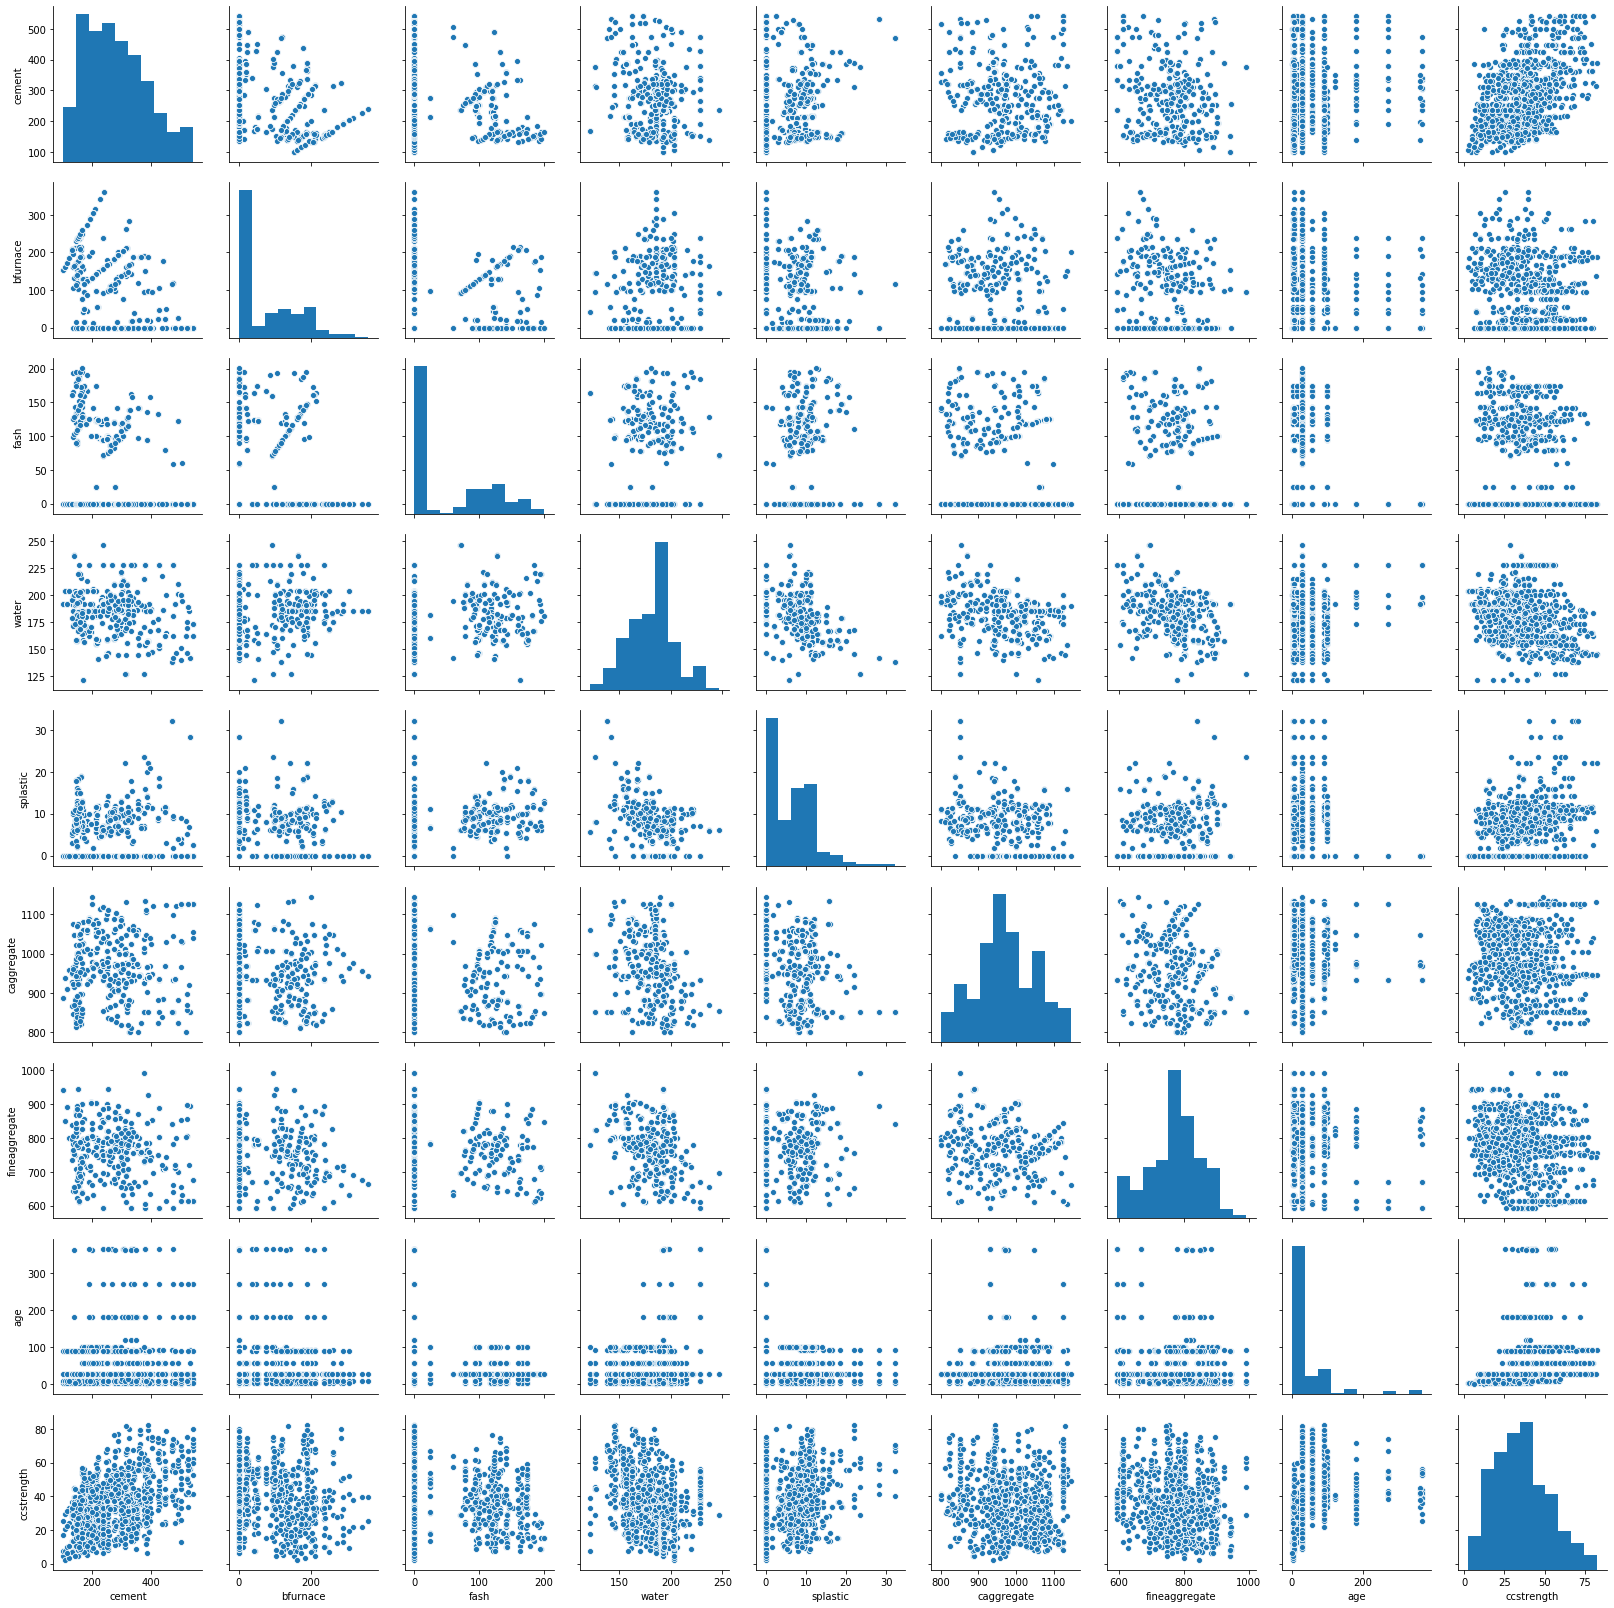

In [13]:
#let's check the pairplot using seaborn_library

sns.pairplot(con_data)

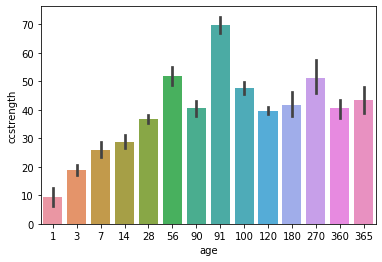

In [14]:
#Average comprehensive strength grouped by age

sns.barplot( data=con_data, x="age",y="ccstrength")
plt.show()


In [15]:
con_data.shape

(1030, 9)

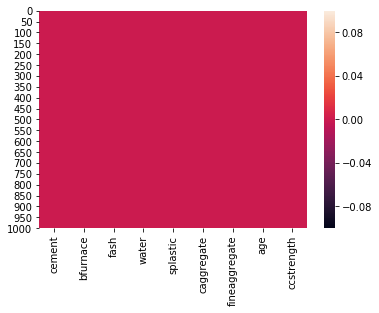

In [16]:
sns.heatmap(con_data.isnull())

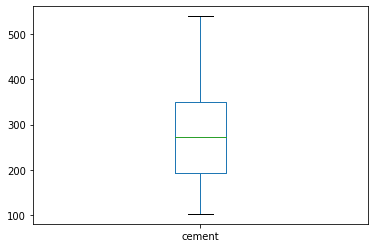

In [17]:
#outliers

con_data['cement'].plot.box()

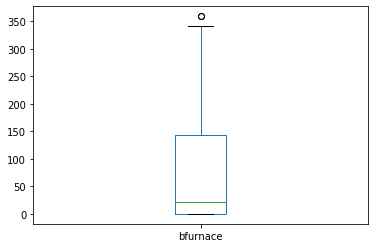

In [18]:
con_data['bfurnace'].plot.box()

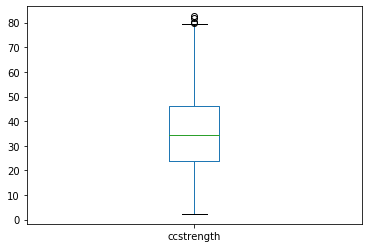

In [19]:
con_data['ccstrength'].plot.box()

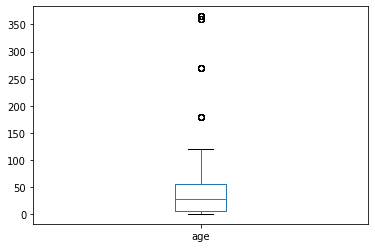

In [20]:
con_data['age'].plot.box()

cement              AxesSubplot(0.125,0.657941;0.227941x0.222059)
bfurnace         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
fash             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
water               AxesSubplot(0.125,0.391471;0.227941x0.222059)
splastic         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
caggregate       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
fineaggregate          AxesSubplot(0.125,0.125;0.227941x0.222059)
age                 AxesSubplot(0.398529,0.125;0.227941x0.222059)
ccstrength          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

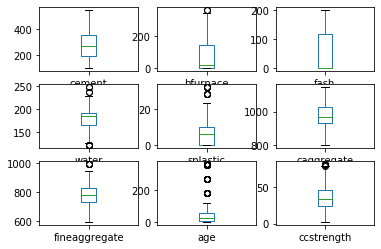

In [21]:
con_data.plot(kind='box',subplots=True, layout=(3,3))

In [22]:

from scipy.stats import zscore
z=np.abs(zscore(con_data))
print(con_data.shape)


z

(1030, 9)


array([[2.47791782, 0.85688631, 0.84713204, ..., 1.21765845, 0.27973311,
        2.64519215],
       [2.47791782, 0.85688631, 0.84713204, ..., 1.21765845, 0.27973311,
        1.5612771 ],
       [0.49144303, 0.79553263, 0.84713204, ..., 2.24091255, 3.55306569,
        0.26660766],
       ...,
       [1.2700575 , 0.75958527, 0.85066095, ..., 0.08012724, 0.27973311,
        0.7259282 ],
       [1.16857975, 1.3080724 , 0.84713204, ..., 0.19118775, 0.27973311,
        0.18264932],
       [0.19401043, 0.30850389, 0.37696733, ..., 0.15072887, 0.27973311,
        0.20461667]])

In [23]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


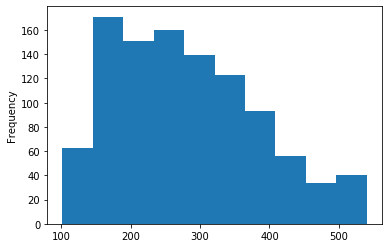

In [24]:
con_data['cement'].plot.hist()

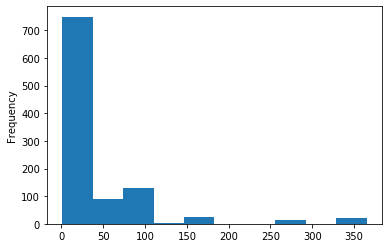

In [25]:
con_data['age'].plot.hist()

In [26]:
#Lets check the skewness of the dataset
con_data.skew()


cement           0.509517
bfurnace         0.800737
fash             0.537445
water            0.074324
splastic         0.908113
caggregate      -0.040206
fineaggregate   -0.252979
age              3.269177
ccstrength       0.416922
dtype: float64

In [27]:
#by using log
import numpy as np
for col in con_data.columns:
    if con_data.skew().loc[col]>0.55:
        con_data[col]=np.log1p(con_data[col])


In [28]:
#again check the skrewness
con_data.skew()

cement           0.509517
bfurnace        -0.032692
fash             0.537445
water            0.074324
splastic        -0.324634
caggregate      -0.040206
fineaggregate   -0.252979
age             -0.005085
ccstrength       0.416922
dtype: float64

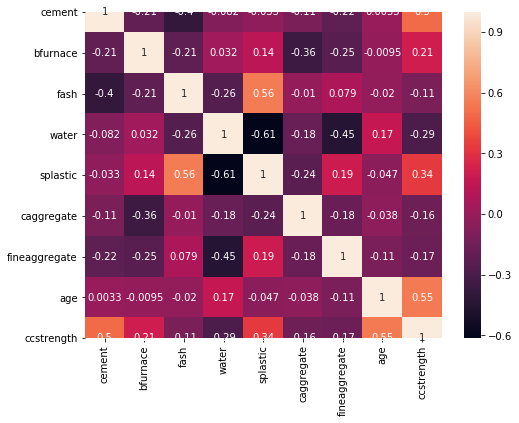

In [29]:
corr_hmap=con_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_hmap,annot=True)
plt.show()

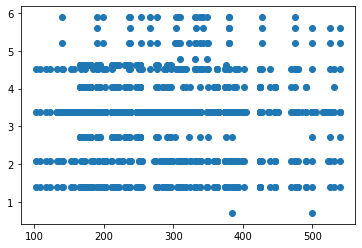

In [30]:
plt.scatter(con_data['cement'],con_data['age'])
plt.show()

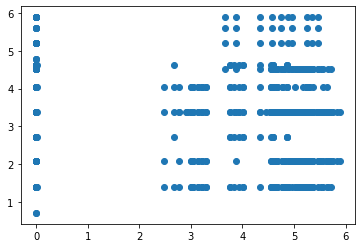

In [31]:
plt.scatter(con_data['bfurnace'],con_data['age'])
plt.show()

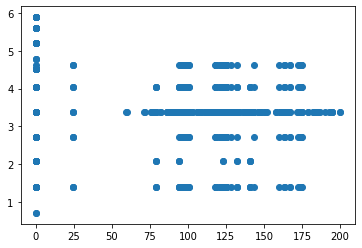

In [32]:
plt.scatter(con_data['fash'],con_data['age'])
plt.show()

In [33]:
con_newdata=con_data[(z<3).all(axis=1)]

In [34]:
con_data.shape

(1030, 9)

In [35]:
con_newdata.shape

(981, 9)

In [36]:
con_data=con_newdata
con_data.shape

(981, 9)

In [37]:
x=con_data.iloc[:,0:-1]
x.head()

,cement,bfurnace,fash,water,splastic,caggregate,fineaggregate,age
0,540.0,0.000000,0.0,162.0,1.252763,1040.0,676.0,3.367296
1,540.0,0.000000,0.0,162.0,1.252763,1055.0,676.0,3.367296
5,266.0,4.744932,0.0,228.0,0.000000,932.0,670.0,4.510860
7,380.0,4.564348,0.0,228.0,0.000000,932.0,594.0,3.367296
8,266.0,4.744932,0.0,228.0,0.000000,932.0,670.0,3.367296


In [38]:
y=con_data.iloc[:,-1]
y.head()

0    79.986111
1    61.887366
5    47.029847
7    36.447770
8    45.854291
Name: ccstrength, dtype: float64

In [39]:
x.shape

(981, 8)

In [40]:
y.shape

(981,)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=50)

In [42]:
x_train.shape

(657, 8)

In [43]:
y_train.shape

(657,)

In [44]:
x_test.shape

(324, 8)

In [45]:
y_test.shape

(324,)

In [46]:
#by using the linear regression Algorithm

In [47]:
lm=LinearRegression()

In [48]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lm.coef_

array([ 9.18882645e-02,  2.16744436e+00,  4.15577837e-03, -2.06024843e-01,
        2.66426233e+00,  4.89239412e-03, -1.18965041e-02,  9.72309371e+00])

In [50]:
lm.intercept_

11.277273043382884

In [51]:
con_data.columns

Index(['cement', 'bfurnace', 'fash', 'water', 'splastic', 'caggregate',
       'fineaggregate', 'age', 'ccstrength'],
      dtype='object')

In [52]:
lm.score(x_train,y_train)

0.8205736277145137

In [53]:
#predict the value
pred=lm.predict(x_test)
y_pred=lm.predict(x_test)
print("predicted result price:", pred)
print("actual price",y_test)

predicted result price: [31.67078311 46.7364844   0.68058527 10.57495033 34.7753733  25.87634659
 29.43936837 45.78079127 18.30964279 44.91789881  9.16838277 11.33353273
 47.32512378 30.96113896 19.5418668  21.98137317 63.68696011 34.65921326
 44.17862761 58.08733276 33.66473669 46.97169729 20.70496091 32.46839206
 16.05608645 45.15571064 34.64098472 30.65471098 75.18401452 22.5457599
 46.96835597 61.11822371 40.35321538 12.11495178 29.55408032 50.01791037
 17.02141584 49.4265719  10.41568767 42.23263626 37.37104599 29.71070833
 37.86974841 35.52434466 54.03683622 28.28226815 47.12660226 54.59328197
 13.6019287  42.68703691 10.58473427 47.27340119 15.63606656 29.83641325
 29.59163121 33.27592612 38.44744392 44.5647519  67.3255341  16.05756625
 44.24482074 44.56930449 17.06970328  7.96334307 56.65559884 36.76539417
 44.01311372 42.81301938 43.50792784 21.05447859 40.17731778 57.11652666
 26.84267066 63.49372271 38.39827452 39.47882683 32.74460704  5.05696618
 33.11695461 42.47748107 15.

In [54]:
print('error')

print("Mean absolute erroe:",mean_absolute_error(y_test,pred))
print("Mean squared erroe:",mean_squared_error(y_test,pred))

print("Root Mean squared Error:",np.sqrt(mean_squared_error(y_test,pred)))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

error
Mean absolute erroe: 5.4377776046166115
Mean squared erroe: 48.88169550231981
Root Mean squared Error: 6.991544572004087
RMSE is :  6.991544572004087


In [55]:
#r2 score  --> coefficient of determination
#ls the proporation of the varience in the dependent variable that is predictable from the independent variable(s)
#i.e., change coming in y whenever x is being changed

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))


0.8103250713392243


from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

#cross value

from sklearn.model_selection import cross_val_score

gnbscores=cross_val_score(gnb, x, y, cv=5)
print(gnbscores)
print(gnbscores.mean(), gnbscores.std())


from sklearn.model_selection import cross_val_score

svcscores=cross_val_score(gnb, x, y, cv=5)
print(svcscores)
print(svcscores.mean(), svcscores.std())

from sklearn.model_selection import cross_val_score

dtscores=cross_val_score(gnb, x, y, cv=5)
print(dtscores)
print(dtscores.mean(), dtscores.std())

In [56]:
#Let it be save complete model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lm, 'concrete_data.pkl')


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['concrete_data.pkl']